In [159]:
import pandas as pd


file_path = '/content/side_effect_data 1.xlsx'
data = pd.read_excel(file_path)


print("Eksik değerlerin sayısı:")
print(data.isnull().sum())

Eksik değerlerin sayısı:
Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


In [160]:
print("\nVeri seti yapısı:")
data.info()


Veri seti yapısı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                  

In [161]:
print("\nSayısal sütunların istatistiksel özellikleri:")
print(data.describe())


Sayısal sütunların istatistiksel özellikleri:
       Kullanici_id                   Dogum_Tarihi  \
count   2357.000000                           2357   
mean      97.216801  1974-11-25 04:06:12.677131936   
min        1.000000            1939-10-12 00:00:00   
25%       47.000000            1959-02-05 00:00:00   
50%       97.000000            1973-09-09 00:00:00   
75%      146.000000            1992-03-24 00:00:00   
max      196.000000            2011-04-25 00:00:00   
std       57.017200                            NaN   

               Ilac_Baslangic_Tarihi              Ilac_Bitis_Tarihi  \
count                           2357                           2357   
mean   2022-01-07 10:47:36.173101312  2022-03-10 16:25:27.365294848   
min              2022-01-01 00:00:00            2022-03-02 00:00:00   
25%              2022-01-04 00:00:00            2022-03-06 00:00:00   
50%              2022-01-07 00:00:00            2022-03-11 00:00:00   
75%              2022-01-11 00:00:00    

In [162]:
print(data.isnull().sum())


Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


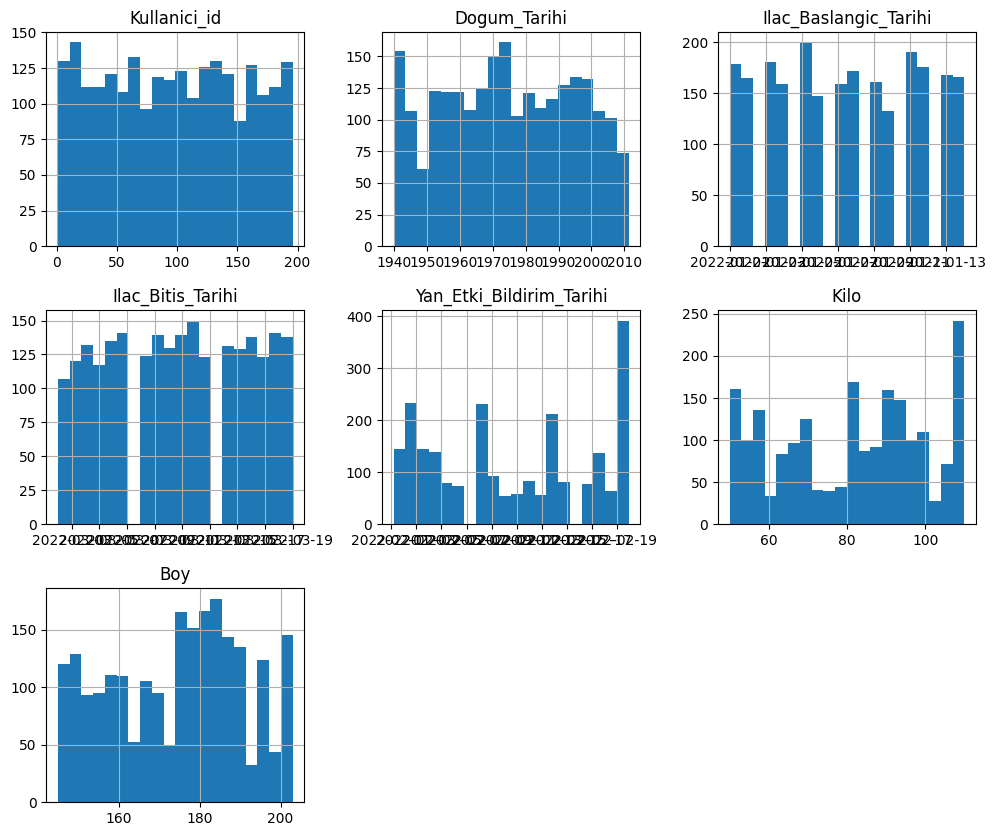

In [163]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 10), bins=20)
plt.show()


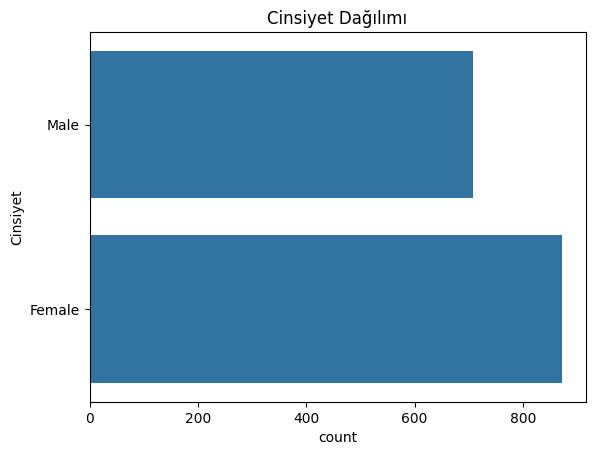

In [164]:
import seaborn as sns

sns.countplot(data['Cinsiyet'])
plt.title("Cinsiyet Dağılımı")
plt.show()


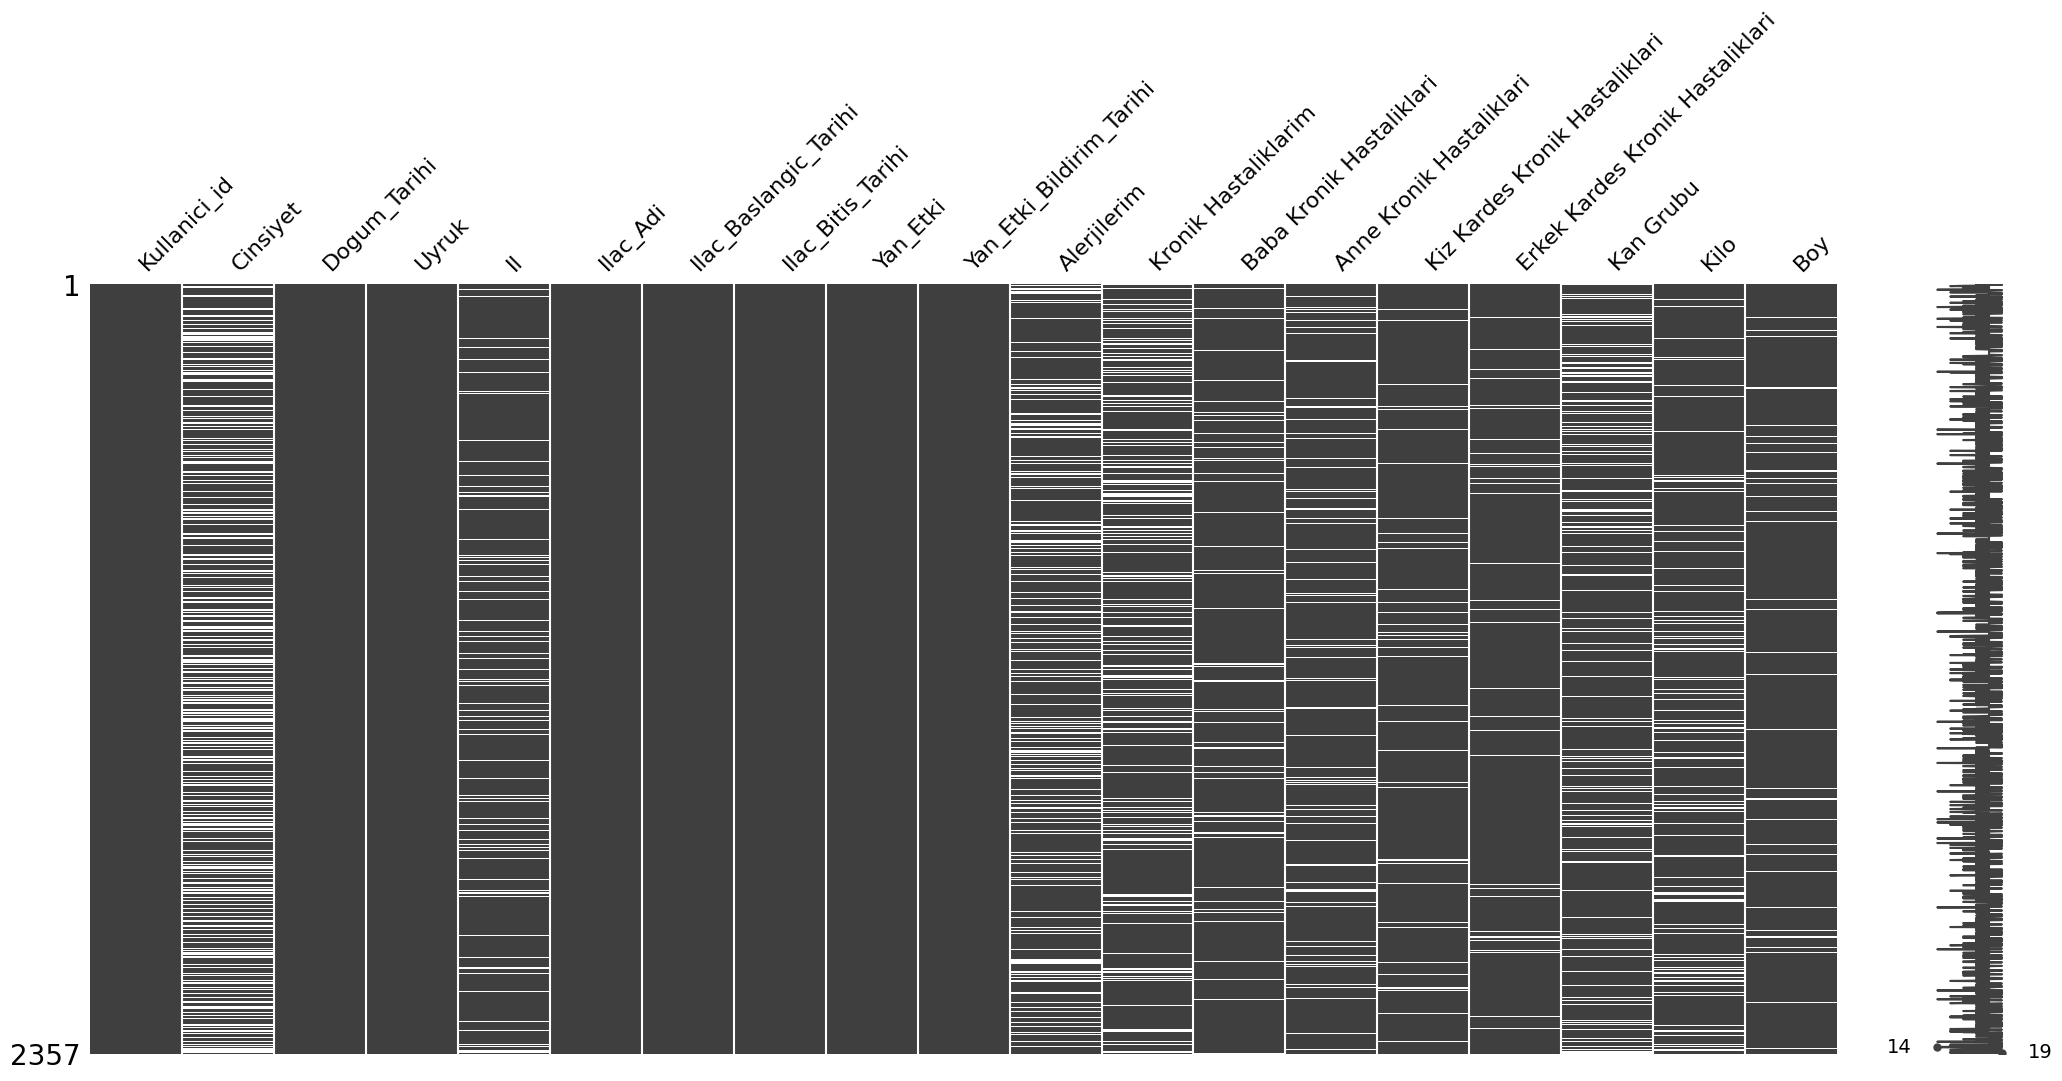

In [165]:
import missingno as msno

msno.matrix(data)
plt.show()


In [166]:
print("\nKilo ve Boy sütunlarının dağılımı:")
print(data[['Kilo', 'Boy']].describe())



Kilo ve Boy sütunlarının dağılımı:
              Kilo          Boy
count  2064.000000  2243.000000
mean     80.863857   174.638431
std      18.635269    16.516552
min      50.000000   145.000000
25%      65.000000   160.000000
50%      83.000000   176.000000
75%      96.000000   187.000000
max     110.000000   203.000000


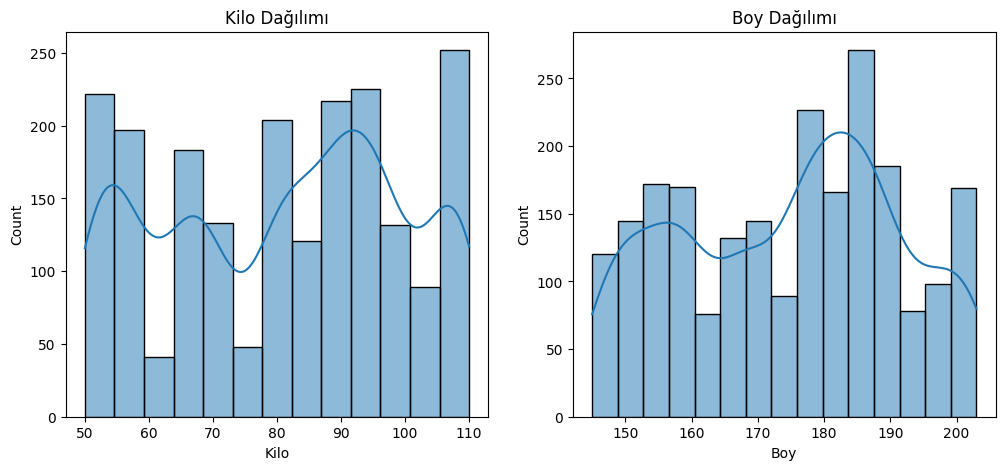

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Kilo'], kde=True)
plt.title('Kilo Dağılımı')
plt.subplot(1, 2, 2)
sns.histplot(data['Boy'], kde=True)
plt.title('Boy Dağılımı')
plt.show()


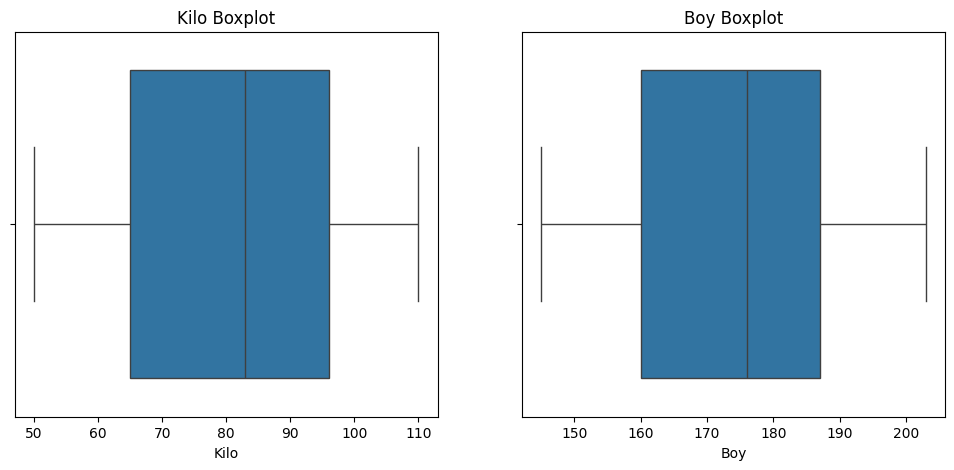

In [168]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Kilo'])
plt.title('Kilo Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Boy'])
plt.title('Boy Boxplot')
plt.show()

In [169]:
data = data.drop(['Kullanici_id'], axis=1)


In [170]:
data = pd.get_dummies(data, columns=['Uyruk'], drop_first=True)


In [171]:
from sklearn.impute import SimpleImputer


numerical_imputer = SimpleImputer(strategy='mean')
data[['Kilo', 'Boy']] = numerical_imputer.fit_transform(data[['Kilo', 'Boy']])


In [172]:
categorical_columns = ['Cinsiyet', 'Il', 'Alerjilerim', 'Kronik Hastaliklarim',
                       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
                       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
                       'Kan Grubu']

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])


missing_values_after = data.isnull().sum()
print(missing_values_after)


Cinsiyet                            0
Dogum_Tarihi                        0
Il                                  0
Ilac_Adi                            0
Ilac_Baslangic_Tarihi               0
Ilac_Bitis_Tarihi                   0
Yan_Etki                            0
Yan_Etki_Bildirim_Tarihi            0
Alerjilerim                         0
Kronik Hastaliklarim                0
Baba Kronik Hastaliklari            0
Anne Kronik Hastaliklari            0
Kiz Kardes Kronik Hastaliklari      0
Erkek Kardes Kronik Hastaliklari    0
Kan Grubu                           0
Kilo                                0
Boy                                 0
dtype: int64


In [173]:
data = pd.get_dummies(data, columns=['Cinsiyet'], drop_first=True)


In [174]:
data = pd.get_dummies(data, columns=['Il'], drop_first=True)


In [175]:
data = pd.get_dummies(data, columns=['Ilac_Adi'], drop_first=True)


In [176]:
from datetime import datetime


data = pd.get_dummies(data, columns=['Yan_Etki'], drop_first=True)
data['Bildirim_Suresi'] = (datetime.now() - data['Yan_Etki_Bildirim_Tarihi']).dt.days


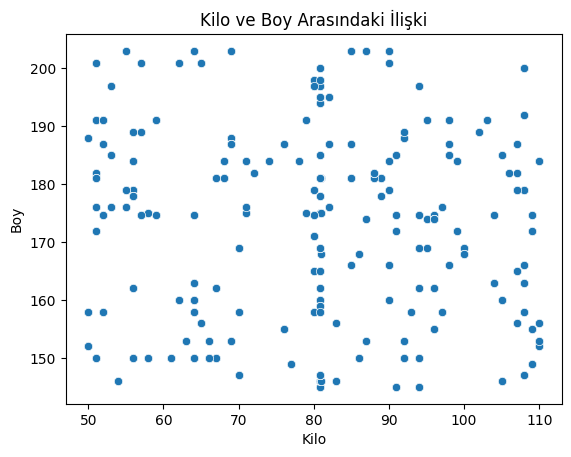

In [177]:
sns.scatterplot(x='Kilo', y='Boy', data=data)
plt.title('Kilo ve Boy Arasındaki İlişki')
plt.show()


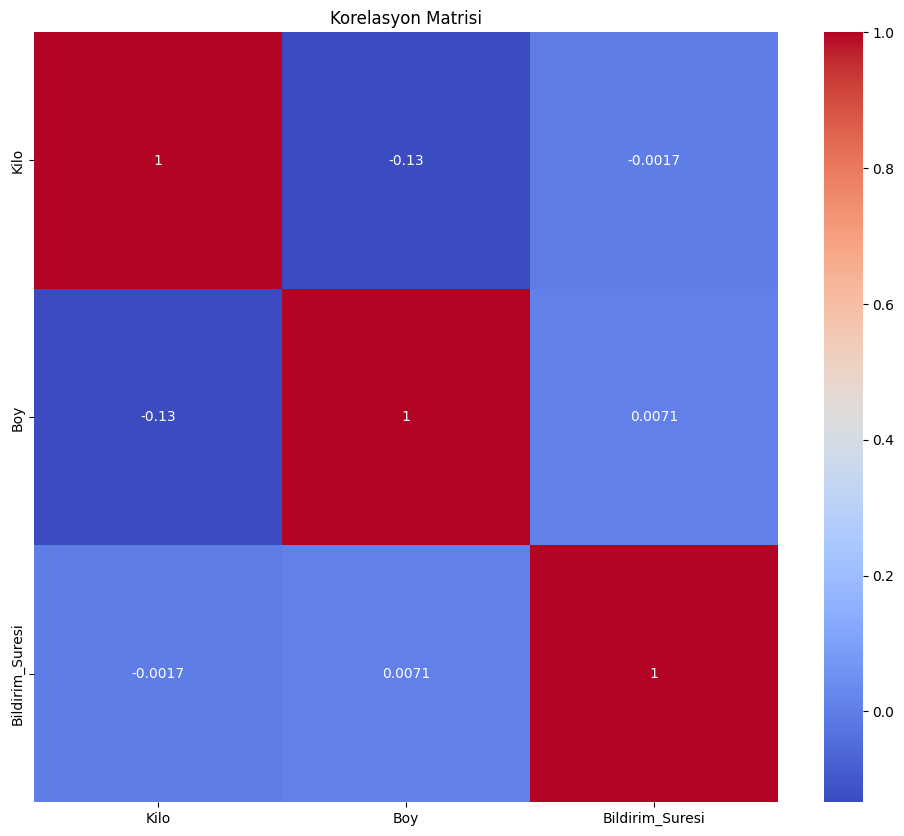

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


In [179]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Kilo', 'Boy']] = scaler.fit_transform(data[['Kilo', 'Boy']])


In [180]:
Q1 = data['Kilo'].quantile(0.25)
Q3 = data['Kilo'].quantile(0.75)
IQR = Q3 - Q1


data = data[~((data['Kilo'] < (Q1 - 1.5 * IQR)) | (data['Kilo'] > (Q3 + 1.5 * IQR)))]


In [181]:
from datetime import datetime


data['Yas'] = datetime.now().year - data['Dogum_Tarihi'].dt.year


In [182]:
data['Ilac_Kullanım_Suresi'] = (data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days


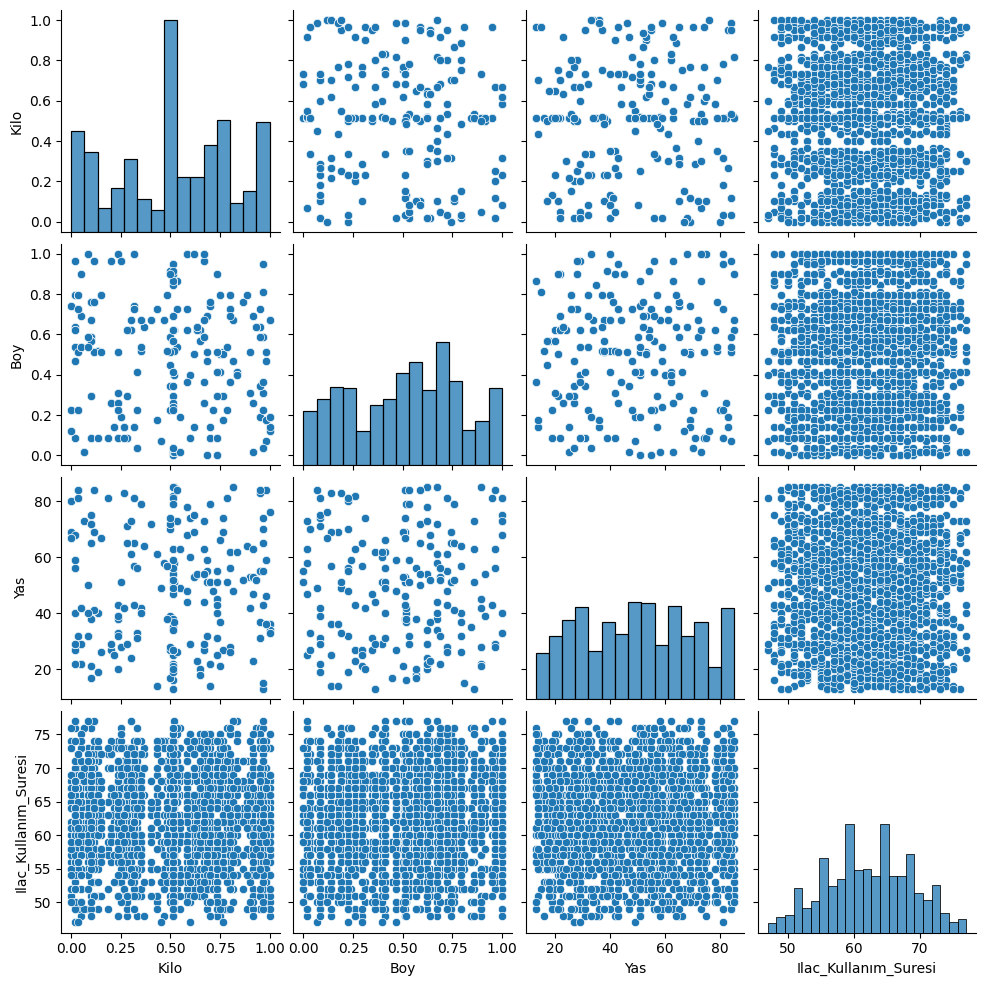

In [183]:
sns.pairplot(data[['Kilo', 'Boy', 'Yas', 'Ilac_Kullanım_Suresi']])
plt.show()


In [184]:
data = pd.get_dummies(data, columns=['Kan Grubu'], drop_first=True)


In [185]:
print(data.head())


  Dogum_Tarihi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  \
0   1960-03-01            2022-01-09        2022-03-04   
1   1939-10-12            2022-01-09        2022-03-08   
2   1976-12-17            2022-01-11        2022-03-12   
3   1977-06-17            2022-01-04        2022-03-12   
4   1976-09-03            2022-01-13        2022-03-06   

  Yan_Etki_Bildirim_Tarihi Alerjilerim             Kronik Hastaliklarim  \
0      2022-02-19 18:28:43       Ceviz  Hipertansiyon, Kan Hastaliklari   
1      2022-02-03 20:48:17         Toz                 Alzheimer, Diger   
2      2022-02-04 05:29:20         Muz       Kalp Hastaliklari, Diyabet   
3      2022-02-08 01:01:21      Pancar                   Diyabet, Diger   
4      2022-02-12 05:33:06     Domates       Diyabet, Kalp Hastaliklari   

   Baba Kronik Hastaliklari          Anne Kronik Hastaliklari  \
0      Guatr, Hipertansiyon                              KOAH   
1              Guatr, Diger  Hipertansiyon, Kalp Hastaliklari   
2    